# General FLow for ML Project:
1. Find Data
2. Preprocessing (Resize, Labeling, Balance, Shuffle, Train(validate and test split)
3. ANN Architecture (Layers, Input, Output, Compile:optimizer,loss,metrics)
4. Training (Fit,Hyper parameters optimization, Validation, Plot) - Reiterative process
5. Evaluate (test)
6. Deploy
7. Invoice

In [3]:
import os, shutil

original_dataset_dir = "cats_vs_dogs/train"

dirs = []

base_dir = "cats_vs_dogs_small" #directory base where we will work and where we find other folders

dirs.append(base_dir)

All this code create a subfolder for a smaller set for training and test with subfolders where 
we divide cats by dogs so when we define the class_mode=binary in the generator, he has alerady 
the images splitted in folder in classes. What else we could do is to have more than two 
classes switching to class_mode=categorical so we could have as many classes as we want

In [4]:
#Defining path for the 3 subfolders TRAIN, VALIDATION, TEST

train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)

validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)

test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)

In [5]:
#Defining path for the 2 subfolders CATS and DOGS in every of the 3 previous folders

#train directory
train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)

#validation directory
validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)

#test directory
test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)

In [6]:
#let's check all the paths that we have added after creating the folders in python
dirs

['cats_vs_dogs_small',
 'cats_vs_dogs_small/train',
 'cats_vs_dogs_small/validation',
 'cats_vs_dogs_small/test',
 'cats_vs_dogs_small/train/cats',
 'cats_vs_dogs_small/train/dogs',
 'cats_vs_dogs_small/validation/cats',
 'cats_vs_dogs_small/validation/dogs',
 'cats_vs_dogs_small/test/cats',
 'cats_vs_dogs_small/test/dogs']

### shutil.copyfile(src, dst, *, follow_symlinks=True)
Copy the contents (no metadata) of the file named src to a file named dst and return dst. src and dst are path names given as strings. dst must be the complete target file name <br>

To make it easier and faster, we are taking 2000 pictures from train and creating 3 subfolder with already the split of the classes and taking 1k for training, 500 for validation and other 500 for test

In [9]:
for directory in dirs:
    if not os.path.exists(directory):
       os.mkdir(directory)

#copying pictures in train cats (1000)
fnames = ["cat.{}.jpg".format(i) for i in range(1000)]  #we are giving the name as the original dataset
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #path to the picture in the original dataset
    dest = os.path.join(train_cats_dir, fname)      #destination of the picture in the new folder
    shutil.copy(src, dest)
    
#copying pictures in vaidation cats (500)
fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)

#copying pictures in test cats (500)
fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)

#copying pictures in train dogs (1000)
fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)

#copying pictures in validation dogs (500 pictures)
fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)

#copying pictures in test dogs (500 pictures)
fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)

for directory in dirs:
    print(directory, ":", len(os.listdir(directory)))

print("Done.")

cats_vs_dogs_small : 4
cats_vs_dogs_small/train : 3
cats_vs_dogs_small/validation : 2
cats_vs_dogs_small/test : 2
cats_vs_dogs_small/train/cats : 1000
cats_vs_dogs_small/train/dogs : 1000
cats_vs_dogs_small/validation/cats : 500
cats_vs_dogs_small/validation/dogs : 500
cats_vs_dogs_small/test/cats : 500
cats_vs_dogs_small/test/dogs : 500
Done.


## Define the CNN Architecture
 
### To reduce overfitting 
Use the Dropout layer that put some stress to the NN and tend to generalize better
we could reduce our NN (make it smaller) <br>
add more data <br>
adding Dropout <br>
weight regularization (Advanced topic) <br>
data augmentation

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(
    32, (3, 3),  #in the output which is the probability of the 32 of edges
    activation="relu",
    input_shape=(150, 150, 3)))  #color image RGB and 150x150px
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))

model.add(layers.Dropout(0.25))  #randomly set weights to 0 or small numbers to avoid some calculations

model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

#it is possible to plot the output the output of the layers (check on internet)

Using TensorFlow backend.
/Users/luigibungaro/dsr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [12]:
from keras import optimizers
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# Generator
The generator is a function that can be used directly in the model. It generates data just for the model training without saving them to memory and the advantage is that we could also generate more data than the real quantoty that we have

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary'    #2 subfolder with cats ad dogs splitted
        #class mode could be also categorical (just put as many folder as the classes are)
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
history = model.fit_generator(
    train_generator,   #providing data during training in real time without loading on HD
    steps_per_epoch=100,  #number of sample divided by the batch size
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50
)

Epoch 1/30
10/10 [==============================] - 29s 3s/step - loss: 0.6359 - acc: 0.6450 - val_loss: 0.6518 - val_acc: 0.6140
Epoch 2/30
10/10 [==============================] - 34s 3s/step - loss: 0.6254 - acc: 0.6600 - val_loss: 0.6616 - val_acc: 0.6040
Epoch 3/30
10/10 [==============================] - 32s 3s/step - loss: 0.6248 - acc: 0.6250 - val_loss: 0.6674 - val_acc: 0.5790
Epoch 4/30
10/10 [==============================] - 31s 3s/step - loss: 0.6355 - acc: 0.6100 - val_loss: 0.6432 - val_acc: 0.6400
Epoch 5/30
10/10 [==============================] - 41s 4s/step - loss: 0.6226 - acc: 0.6650 - val_loss: 0.6464 - val_acc: 0.6180
Epoch 6/30
10/10 [==============================] - 41s 4s/step - loss: 0.6490 - acc: 0.6350 - val_loss: 0.6342 - val_acc: 0.6550
Epoch 7/30
10/10 [==============================] - 33s 3s/step - loss: 0.6308 - acc: 0.6600 - val_loss: 0.6476 - val_acc: 0.6230
Epoch 8/30
10/10 [==============================] - 39s 4s/step - loss: 0.6044 - acc: 0.68

In [25]:
model.save('CNN_cats_dogs'+'_model.h5')
#overfitting because training accuracy is higher than the validation accuracy

## What 'next' do in Python --- Example

In [26]:
mylist = iter(["apple", "banana", "cherry"])
x = next(mylist)
print(x)
x = next(mylist)
print(x)
x = next(mylist)
print(x)

apple
banana
cherry


## To see the effects of Data Generator in the images with imshow

Found 2000 images belonging to 2 classes.


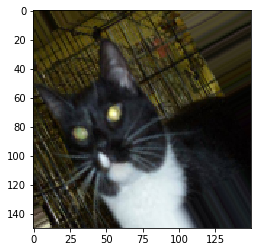

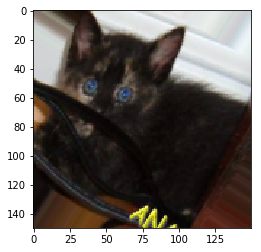

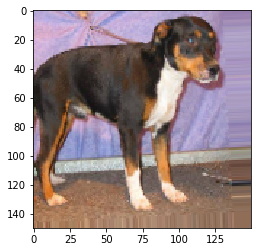

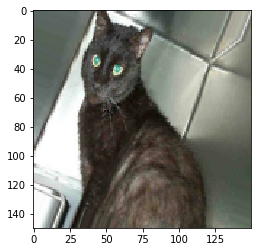

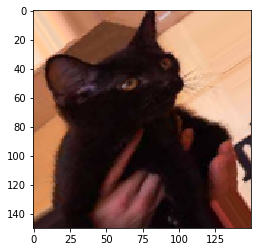

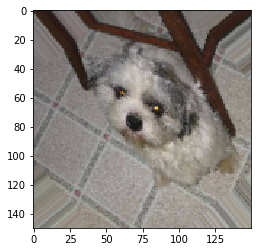

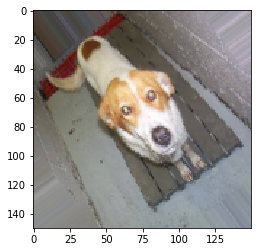

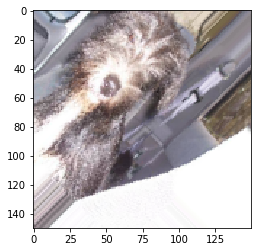

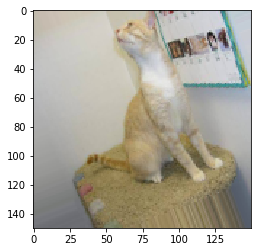

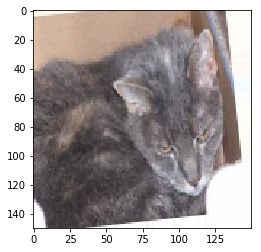

In [67]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=50,
    width_shift_range=20,
    height_shift_range=20,
)

generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode="binary"  #it means that there are classes 0 for cats and 1 for dogs
)

import matplotlib.pyplot as plt
%matplotlib inline

images = next(generator)[0]  
for image in images:
    plt.imshow(image)
    plt.show()
    plt.close()

(150, 150, 3)


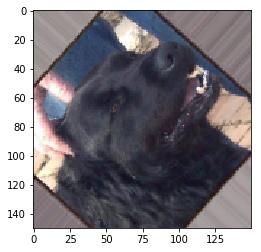

In [69]:
print(next(generator)[0][0].shape)
plt.imshow(next(generator)[0][0])

## Generator

In [74]:
def generate():
    i=0
    while True:
            i +=1
            yield i
g = generate()
print(g)
print(next(g))
print(next(g))
print(next(g))

<generator object generate at 0x128858678>
1
2
3


In [15]:
#this is the generator simplified
def generate(batch_size):
    i=0
    while True:
        arr=[]
        for _ in range(batch_size):
            i+=1
            arr.append(i)
        yield arr
            
g = generate(2)
print(g)
print(next(g))
print(next(g))
print(next(g))

<generator object generate at 0x1168c9360>
[1, 2]
[3, 4]
[5, 6]
